In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input


In [2]:
(x_train, _),(x_test, _)=mnist.load_data()

x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 784)
x_test shape: (10000, 784)


In [3]:
encoding_dim=32
input_img=Input(shape=(784,))

encoded=Dense(encoding_dim ,activation='relu')(input_img)

decoded=Dense(784,activation='sigmoid')(encoded)

autoencoder=Model(input_img,decoded)

autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
235/235 [==============================] - 6s 25ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 2/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 3/50
235/235 [==============================] - 2s 11ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 9/50
235/235 [==============================] - 3s 15ms/step - loss: 0.0925 - val_loss: 0.0915
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0925 - val_lo

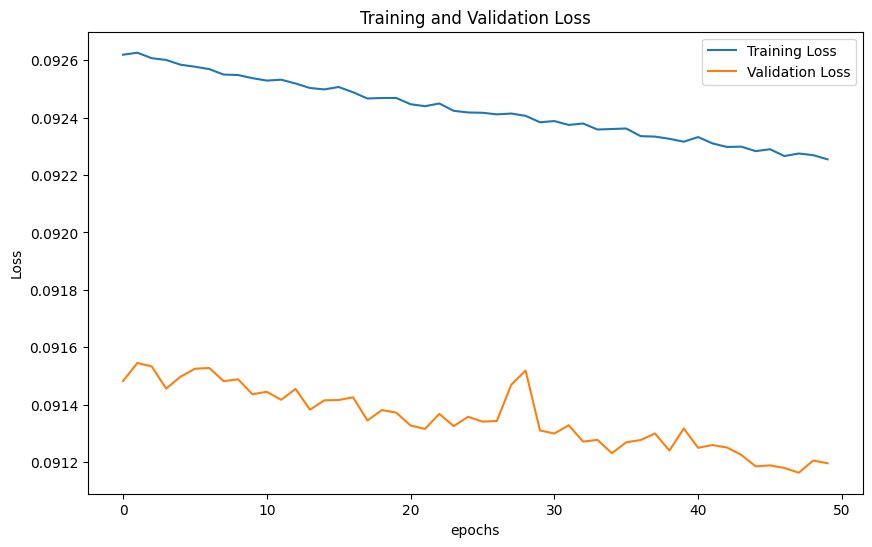

In [5]:
history=autoencoder.fit(x_train,x_train,
                        epochs=50,
                        batch_size=256,
                        shuffle=True,
                        validation_data=(x_test,x_test))
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [6]:
encoder=Model(input_img,encoded)

encoded_imgs=encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [7]:
decoder_layer=autoencoder.layers[-1]
decoder=Model(encoded,decoder_layer(encoded))
decoded_imgs=decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


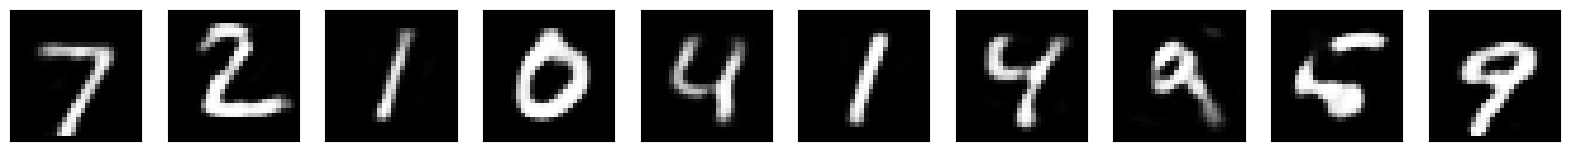

In [8]:
n=10
plt.figure(figsize=(20,4))

for i in range(n):
  ax=plt.subplot(2,n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax=plt.subplot(2,n, i+1)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()


In [9]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(x_test,decoded_imgs)
print(f'Mean Squared Error between the original and Decoded_imgs:{mse}')

Mean Squared Error between the original and Decoded_imgs:0.009496407583355904


In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model

In [17]:
(x_train_cifar, _), (x_test_cifar, _)=cifar10.load_data()

x_train_cifar=x_train_cifar.astype('float32')/255.
x_test_cifar=x_test_cifar.astype('float32')/255.

print('x_train shape:', x_train_cifar.shape )
print('x_test shape:', x_test_cifar.shape )

170498071/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [18]:
input_img_cifar= Input(shape=(32,32,3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img_cifar)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded_cifar = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

In [19]:
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded_cifar)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded_cifar = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [27]:
autoencoder_cifar=Model(input_img_cifar,decoded_cifar)
autoencoder_cifar.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder_cifar.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         7385

In [28]:
x_train_cifar=x_train_cifar.reshape((len(x_train_cifar), 32,32,3))
x_test_cifar=x_test_cifar.reshape((len(x_test_cifar), 32,32,3))



history_cifar=autoencoder_cifar.fit(x_train_cifar,
                                    x_train_cifar,
                                    epochs=1,
                                    batch_size=128,
                                    shuffle=True,
                                    validation_data=
                                    (x_test_cifar,
                                                  x_test_cifar))

391/391 [==============================] - 463s 1s/step - loss: 0.5752 - val_loss: 0.5629


In [29]:
decoded_imgs_cifar=autoencoder_cifar.predict(x_test_cifar)

n=10
plt.figure(figsize=(20,4))

313/313 [==============================] - 24s 75ms/step


<Figure size 2000x400 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

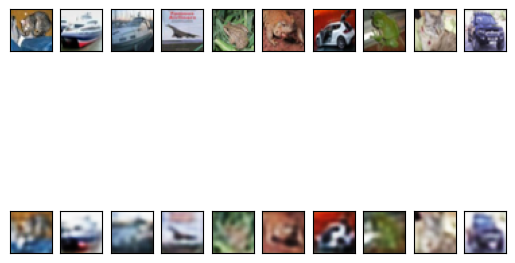

In [30]:
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test_cifar[i].reshape(32,32,3))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs_cifar[i].reshape(32,32,3))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()